# Jurnal Modul 4

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

(<Axes: >, <matplotlib.image.AxesImage at 0x159e1da5590>)

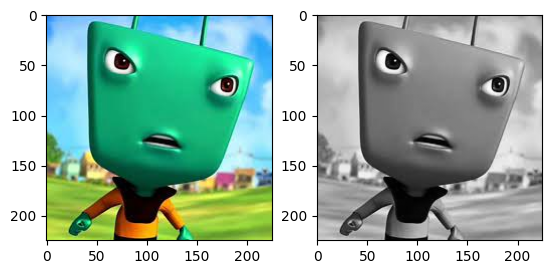

In [41]:
adudu_rgb = plt.imread("Assets/adudu.jpg")
adudu = cv2.cvtColor(adudu_rgb, cv2.COLOR_RGB2GRAY)

plt.subplot(1,2,1), plt.imshow(adudu_rgb)
plt.subplot(1,2,2), plt.imshow(adudu, cmap="gray")

##### Mean Filter

In [42]:
def mean(matriks):
    sum_matriks = np.sum(matriks)
    tinggi, lebar = matriks.shape
    return sum_matriks / (tinggi * lebar)

def mean_filter(image, filter_tinggi, filter_lebar):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)

    padd_tinggi = (filter_tinggi - 1) // 2
    padd_lebar = (filter_lebar - 1) // 2

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    for i in range(tinggi):
        for j in range(lebar):
            patch = np.zeros((filter_tinggi, filter_lebar))
            for ii in range(filter_tinggi):
                for jj in range(filter_lebar):
                    x = i + ii
                    y = j + jj
                    if x < 0 or y < 0 or x >= padded_img.shape[0] or y >= padded_img.shape[1]:
                        patch[ii][jj] = 0
                    else:
                        patch[ii][jj] = padded_img[x][y]
            hasil[i][j] = mean(patch)
    return hasil

##### Modus Filter

In [43]:
def modus(matriks):
    array = matriks.flatten()
    counts = {}

    for i in range(array):
        if array[i] not in counts:
            counts[array[i]] = 1
        else:
            counts[array[i]] += 1

    max_count = 0
    modus = None

    for key, nilai in counts.items():
        if nilai > max_count:
            max_count = nilai
            modus = key
    
    return modus

def modus_filter(image, filter_tinggi, filter_lebar):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)

    padd_tinggi = (filter_tinggi - 1) // 2
    padd_lebar = (filter_lebar - 1) // 2

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    for i in range(tinggi):
        for j in range(lebar):
            patch = np.zeros((filter_tinggi, filter_lebar))
            for ii in range(filter_tinggi):
                for jj in range(filter_lebar):
                    x = i + ii
                    y = j + jj
                    if x < 0 or y < 0 or x >= padded_img.shape[0] or y >= padded_img.shape[1]:
                        patch[ii][jj] = 0
                    else:
                        patch[ii][jj] = padded_img[x][y]
            hasil[i][j] = modus(patch)
    return hasil

##### Median Filter

In [44]:
def median(matriks):
    array = matriks.flatten()
    array.sort()
    total = len(array)
    if total % 2 == 0:
        median = (array[total//2 - 1] + array[total//2])/2
    else:
        median = array[total/2]
    return median

def median_filter(image, filter_tinggi, filter_lebar):
    tinggi, lebar = image.shape
    hasil = np.zeros(image.shape)

    padd_tinggi = (filter_tinggi - 1) // 2
    padd_lebar = (filter_lebar - 1) // 2

    padded_img = np.pad(image, ((padd_tinggi, padd_tinggi), (padd_lebar, padd_lebar)), mode="edge")

    for i in range(tinggi):
        for j in range(lebar):
            patch = np.zeros((filter_tinggi, filter_lebar))
            for ii in range(filter_tinggi):
                for jj in range(filter_lebar):
                    x = i + ii
                    y = j + jj
                    if x < 0 or y < 0 or x >= padded_img.shape[0] or y >= padded_img.shape[1]:
                        patch[ii][jj] = 0
                    else:
                        patch[ii][jj] = padded_img[x][y]
            hasil[i][j] = median(patch)
    return hasil

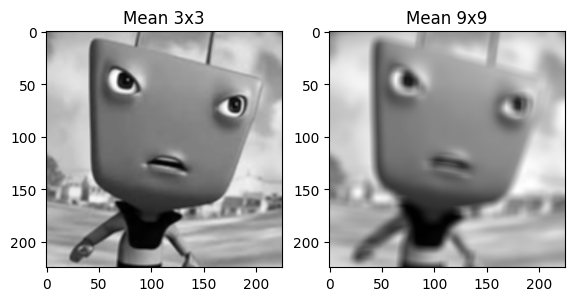

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(2,4,1), plt.imshow(mean_filter(adudu, 3, 3), cmap="gray"), plt.title("Mean 3x3")
plt.subplot(2,4,2), plt.imshow(mean_filter(adudu, 9, 9), cmap="gray"), plt.title("Mean 9x9")

plt.show()